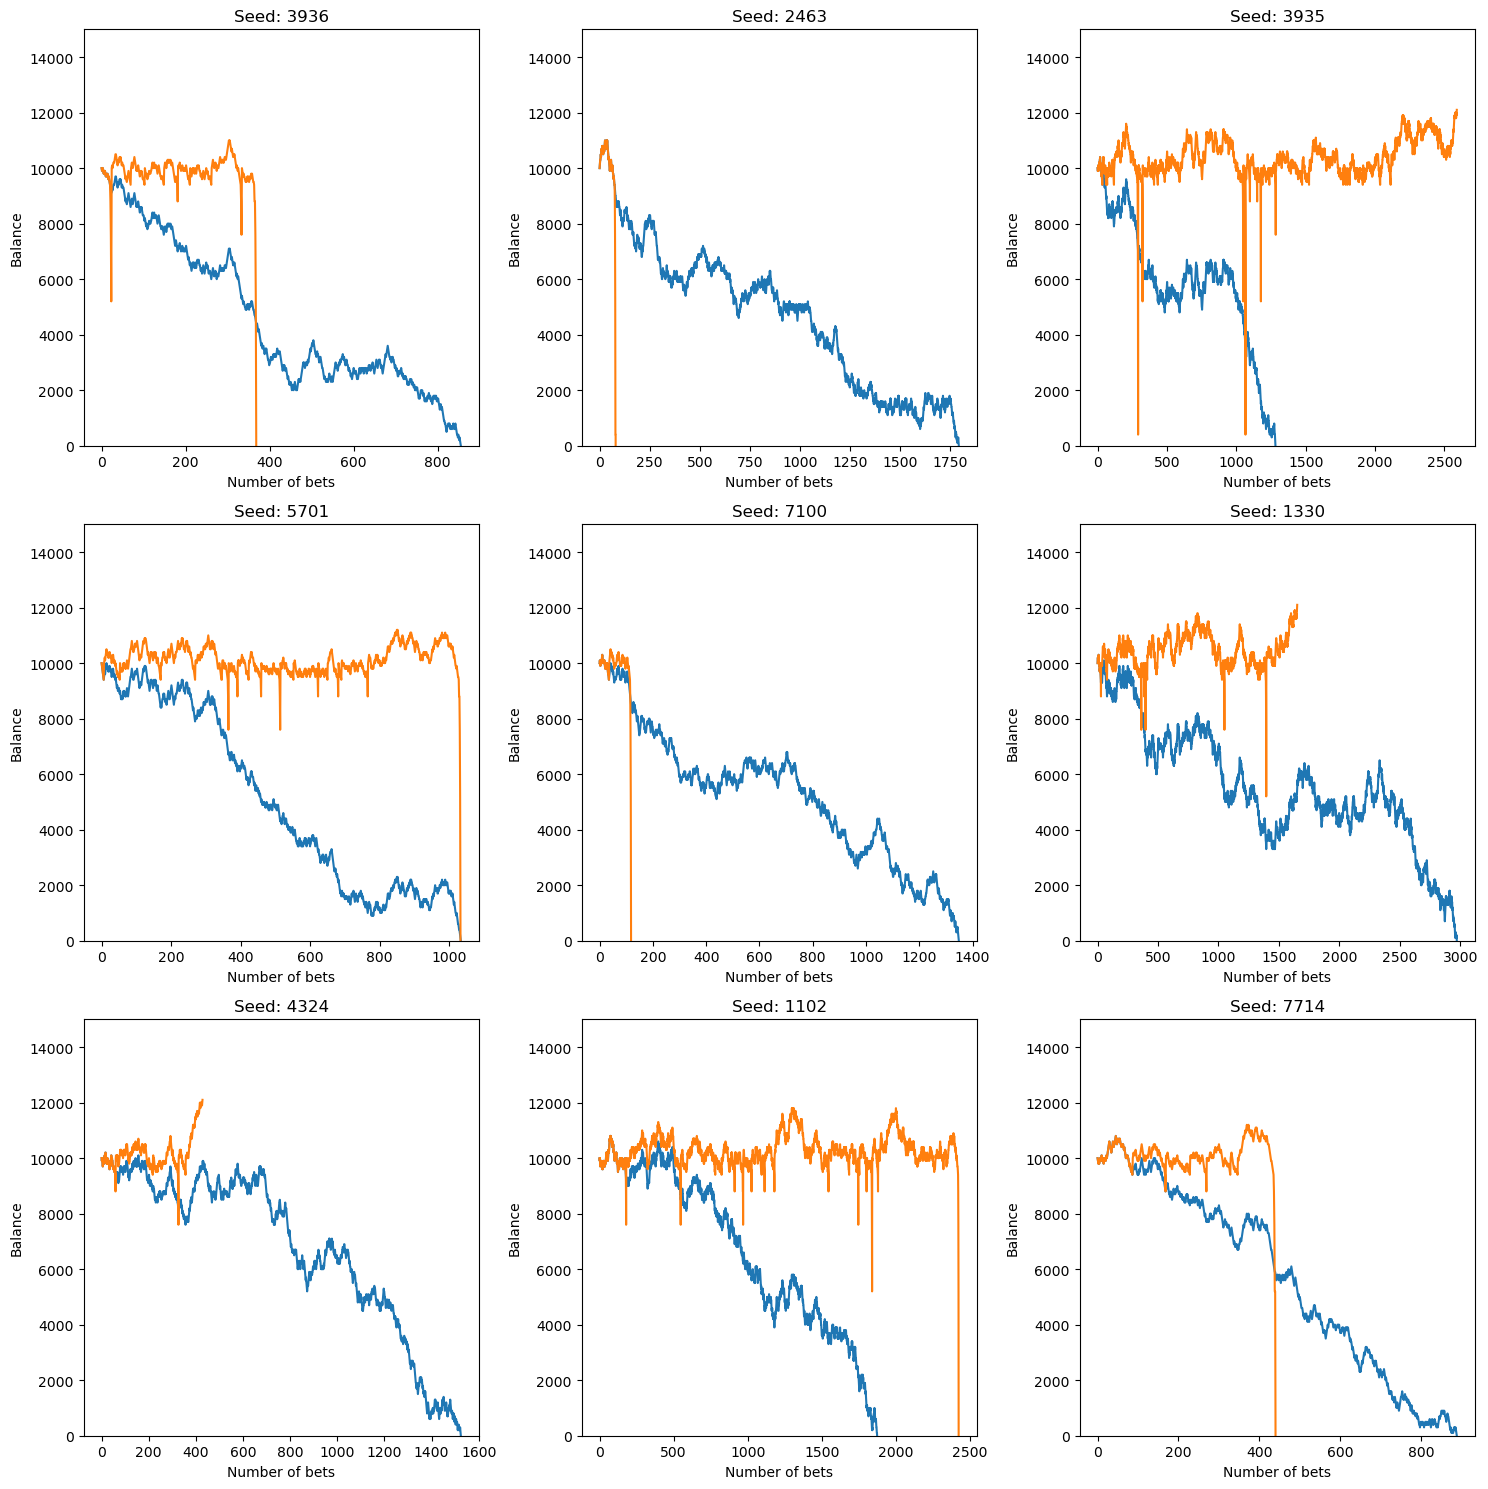

Number of experiments where balance exceeded 12000 (No Boost Gamble): 395
Number of experiments where balance exceeded 12000 (With Boost): 3425


In [1]:
# 导入所需的库
import random
import matplotlib.pyplot as plt
import numpy as np

# 初始设置
initial_balance = 10000  # 初始金额
bet = 100  # 初始赌注
prob_of_winning = 0.4222  # 赢的概率
prob_of_draw = 0.0848  # 平局的概率

# 定义赌博函数
def gamble(seed, balance, bet, boost_gamble=False, off_gamble=False):
    random.seed(seed)
    balances = [balance]

    for i in range(10000):
        if balance <= 0 or (off_gamble and balance > 12000):
            break

        if boost_gamble:
            diff = balance - initial_balance
            if diff < -500:
                bet = abs(diff)  # 触发boost_gamble
            else:
                bet = 100  # 重置为初始赌注

        random_num = random.random()
        if random_num < prob_of_winning:
            balance += bet
        elif random_num < prob_of_winning + prob_of_draw:
            pass  # 平局，余额不变
        else:
            balance -= bet

        balances.append(balance)

    return balances

# 用10000组不同的随机种子
seeds = list(range(10000))

balances_exceeding_no_boost = 0  # 计数器：使用no boost gamble策略，余额大于12000的实验次数
balances_exceeding_boost = 0  # 计数器：使用boost gamble策略，余额大于12000的实验次数

# 进行赌博，并分别存储每次赌博后的余额
for seed in seeds:
    balances_no_boost = gamble(seed, initial_balance, bet, off_gamble=True) # 同样添加off_gamble功能
    balances_boost = gamble(seed, initial_balance, bet, boost_gamble=True, off_gamble=True)

    # 如果使用no boost gamble策略，余额大于12000，增加计数器
    if max(balances_no_boost) > 12000:
        balances_exceeding_no_boost += 1
    # 如果使用boost gamble策略，余额大于12000，增加计数器
    if max(balances_boost) > 12000:
        balances_exceeding_boost += 1

# 随机挑选9个种子进行可视化
selected_seeds = random.sample(seeds, 9)

# 创建3x3的图像格局
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

# 对选定的种子进行赌博，并分别存储每次赌博后的余额
for i, seed in enumerate(selected_seeds):
    balances_no_boost = gamble(seed, initial_balance, bet, off_gamble=True) # 同样添加off_gamble功能
    balances_boost = gamble(seed, initial_balance, bet, boost_gamble=True, off_gamble=True)

    # 绘制余额变化图
    axs[i].plot(balances_no_boost)  # 去掉图例
    axs[i].plot(balances_boost)  # 去掉图例
    axs[i].set_title(f'Seed: {seed}')
    axs[i].set_xlabel('Number of bets')
    axs[i].set_ylabel('Balance')
    axs[i].set_ylim(0, 2000)  # 设置y轴的范围

    axs[i].set_ylim(0, 15000)  # 设置y轴的范围

plt.tight_layout()  # 使用Tight layout
plt.show()

print(f'Number of experiments where balance exceeded 12000 (No Boost Gamble): {balances_exceeding_no_boost}')
print(f'Number of experiments where balance exceeded 12000 (With Boost): {balances_exceeding_boost}')
